<a href="https://colab.research.google.com/github/LarsBryld/socialdataanalysis2020/blob/master/Oxford.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

ox = pd.read_csv("https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv" , parse_dates=["Date"])

covid = pd.read_csv("https://open-covid-19.github.io/data/data.csv", parse_dates=["Date"], na_values='-')



#Define focus contries based on stock indecies
focuscountries = set(['China', 'Austria', 'Belgium', 'Denmark', 'Finland', 'France', 'Italy', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Netherlands', 'Poland', 'Portugal', 'Spain',
                  'Sweden', 'Switzerland', 'United Kingdom', 'Canada', 'United States', 'Australia', 'New Zealand', 'Hong Kong', 'Japan', 'South Korea', 'Singapore',
                  'Taiwan', 'Brazil', 'Israel', 'India', 'Mexico', 'South Africa', 'Russia'])


#Create dataframes of only focus countries
ox = ox[ox['CountryName'].isin(focuscountries)]
covid = covid[covid['CountryName'].isin(focuscountries)]


#Sometimes, due to data entry errors, we have isgeneral=1 when the underlying indicator is 0 or null. These cases should be disregarded. Only use isgeneral=1 values when the underlying indicator is 1 or higher.

#ox = ox[(ox['S1_IsGeneral'] != 1) & (ox['S1_School closing'] > 0)]
#ox =  (ox['S2_IsGeneral'] != 1) & (ox['S2_Workplace closing'] > 0) 
#ox = ox[(ox['S2_IsGeneral'] != 1) & (ox['S2_Workplace closing'] > 0)]
#ox = ox[(ox['S3_IsGeneral'] != 1) & (ox['S3_Cancel public events'] > 0)]
#ox = ox[(ox['S4_IsGeneral'] != 1) & (ox['S4_Close public transport'] > 0)]
#ox = ox[(ox['S5_IsGeneral'] != 1) & (ox['S5_Public information campaigns'] > 0)]
#ox = ox[(ox['S6_IsGeneral'] != 1) & (ox['S6_Restrictions on internal movement'] > 0)]
#drop2 = ox[(ox['S1_IsGeneral'] == 1) & (ox['S1_School closing'] == 0)] 


#Nine of the indicators (S1–S7, S12 and S13) take policies such as school closures, travel bans, etc, and are recorded on an ordinal scale
#policies = ox[['CountryName', 'Date', 'S1_School closing', 'S2_Workplace closing', 'S3_Cancel public events', 'S3_Cancel public events', 'S4_Close public transport', 'S5_Public information campaigns', 'S6_Restrictions on internal movement', 'S7_International travel controls']]

#the others (S8–S11) are financial indicators such as fiscal or monetary measures
#financial = ox[['CountryName', 'Date', 'S8_Fiscal measures', 'S9_Monetary measures', 'S10_Emergency investment in health care', 'S11_Investment in Vaccines']]

#The tracker aggregates the policy scores (not the financial scores) into a common ‘Stringency Index’.
#stringency = ox[['CountryName', 'Date', 'StringencyIndex']]

ox_country = (ox['CountryName']).unique()
covid_country = (covid['CountryName']).unique()



In [0]:
#Renaming the NaN regional codes to 'Country', since we then can isolate total country level data using this variable

covid['RegionCode'] = covid['RegionCode'].fillna('Country')


In [0]:

print("The Covid data has {} unique countries and {} unique dates".format(len(covid_country),len(covid['Date'].unique())))
print("The Covid data has start data {} and end date {} ".format(min(covid['Date']),max(covid['Date'])))
print("The Oxford data has {} unique countries and {} unique dates".format(len(ox_country),len(ox['Date'].unique())))
print("The Oxford data has start data {} and end date {} ".format(min(ox['Date']),max(ox['Date'])))
print("The country in Oxford data that is NOT in Covid data is THIS Function IS MISSING {:10.0f} ".format(len(ox['CountryName'].unique()),len(ox['Date'].unique())))

# https://www.dataquest.io/blog/python-datetime-tutorial/ useful link to corect the printed date format


The Covid data has 31 unique countries and 130 unique dates
The Covid data has start data 2019-12-30 00:00:00 and end date 2020-05-07 00:00:00 
The Oxford data has 33 unique countries and 128 unique dates
The Oxford data has start data 2020-01-01 00:00:00 and end date 2020-05-07 00:00:00 
The country in Oxford data that is NOT in Covid data is THIS Function IS MISSING         33 


In [0]:
#Creating single country example for test of merging. 
ox_den = ox[ox['CountryName'] == 'Denmark']
covid_den = covid[covid['CountryName'] == 'Denmark']

#Creating single country example for merging test.
ox_it = ox[ox['CountryCode'] == 'ITA']
covid_it = covid[(covid['CountryName'] == 'Italy') & (covid['Key'] == 'IT')]


In [0]:
#reduce the variables that are not being used both in oxford and covid data
drop_ox = ['CountryName', 'CountryCode'] 
ox_it = ox_it.drop(drop_ox, axis=1)

drop_covid = ['Key', 'CountryCode'] 
covid_it = covid_it.drop(drop_covid, axis=1)

In [0]:
# Summing total confirmed cases for it to compare against the entire data set 
it = pd.merge(covid_it,ox_it, how='inner', on='Date')
sum(it['Confirmed'])


7409055.0

In [0]:
# Same as above but for DK 
den = pd.merge(covid_den,ox_den, how='inner', on='Date')
sum(den['Confirmed'])

276584.0

In [0]:
#making a general solution to the above mereging example. oxford_data is the complete data set 

oxford_data = pd.merge(covid,ox, how='inner', on=['Date', 'CountryName'])


In [0]:
#testing that the manual merging example creates the same results as in the oxford_data

it_test = oxford_data[(oxford_data['CountryName'] == 'Italy') & (oxford_data['RegionCode'] == 'Country')]
sum(it_test['Confirmed'])

7409055.0

In [0]:
#same as above but for denmark

dk_test = oxford_data[(oxford_data['CountryName'] == 'Denmark') & (oxford_data['RegionCode'] == 'Country')]
sum(dk_test['Confirmed'])
dk_test.head(5)

,Date,Key,CountryCode_x,CountryName,RegionCode,RegionName,Confirmed,Deaths,Latitude,Longitude,Population,CountryCode_y,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay
8,2020-01-01,DK,DK,Denmark,Country,NaN,0.0,0.0,56.26392,9.501785,5771876.0,DNK,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
35,2020-01-02,DK,DK,Denmark,Country,NaN,0.0,0.0,56.26392,9.501785,5771876.0,DNK,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
62,2020-01-03,DK,DK,Denmark,Country,NaN,0.0,0.0,56.26392,9.501785,5771876.0,DNK,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
89,2020-01-04,DK,DK,Denmark,Country,NaN,0.0,0.0,56.26392,9.501785,5771876.0,DNK,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
116,2020-01-05,DK,DK,Denmark,Country,NaN,0.0,0.0,56.26392,9.501785,5771876.0,DNK,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0


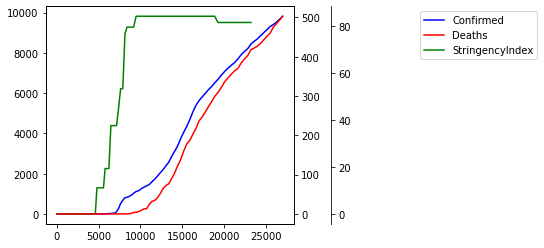

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame


fig, ax = plt.subplots()
ax3 = ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.15))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

dk_test.Confirmed.plot(ax=ax, x=dk_test.Date, style='b-')
# same ax as above since it's automatically added on the right
dk_test.Deaths.plot(ax=ax, x=dk_test.Date, style='r-', secondary_y=True)
dk_test.StringencyIndex.plot(ax=ax3, x=dk_test.Date, style='g-')

# add legend --> take advantage of pandas providing us access
# to the line associated with the right part of the axis
ax3.legend([ax.get_lines()[0], ax.right_ax.get_lines()[0], ax3.get_lines()[0]],\
           ['Confirmed','Deaths','StringencyIndex'], bbox_to_anchor=(2.0, 1.0))

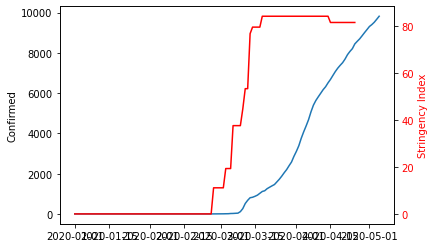

In [0]:
import numpy as np
import matplotlib.pyplot as plt

x = dk_test.Date
y1 = dk_test.Confirmed
y2 = dk_test.StringencyIndex

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x, y1)
ax1.set_ylabel('Confirmed')

ax2 = ax1.twinx()
ax2.plot(x, y2, 'r-')
ax2.set_ylabel('Stringency Index', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

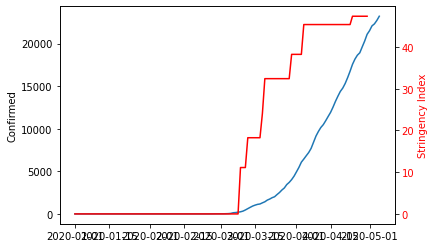

In [0]:
se_test = oxford_data[(oxford_data['CountryName'] == 'Sweden') & (oxford_data['RegionCode'] == 'Country')]


x = se_test.Date
y1 = se_test.Confirmed
y2 = se_test.StringencyIndex

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x, y1)
ax1.set_ylabel('Confirmed')

ax2 = ax1.twinx()
ax2.plot(x, y2, 'r-')
ax2.set_ylabel('Stringency Index', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')


A full description of the strengency index can be found here: 

https://www.bsg.ox.ac.uk/sites/default/files/Calculation%20and%20presentation%20of%20the%20Stringency%20Index.pdf

Additional desciption on a less detailed level: 

https://www.bsg.ox.ac.uk/research/research-projects/coronavirus-government-response-tracker



equals(self, other)

Test whether two objects contain the same elements.

https://pandas.pydata.org/docs/getting_started/basics.html


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html



In [0]:
# Map plot will start from here: 

import requests
import zipfile


def save_file(url, file_name):
  r = requests.get(url)
  with open(file_name, 'wb') as f:
    f.write(r.content)

    
save_file('https://courses.cs.washington.edu/courses/cse163/19sp/' +
          'files/lectures/05-13/data.zip', 'data.zip')
save_file('https://courses.cs.washington.edu/courses/cse163/19sp/' +
          'files/lectures/05-13/gz_2010_us_040_00_5m.json', 
          'gz_2010_us_040_00_5m.json')
save_file('https://courses.cs.washington.edu/courses/cse163/19sp/' +
          'files/lectures/05-13/stormhistory.csv', 'stormhistory.csv')

with zipfile.ZipFile("data.zip","r") as zip_ref:
    zip_ref.extractall()
    
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes

Requirement already up-to-date: geopandas in /usr/local/lib/python3.6/dist-packages (0.7.0)
Requirement already up-to-date: pyshp in /usr/local/lib/python3.6/dist-packages (2.1.0)
Requirement already up-to-date: shapely in /usr/local/lib/python3.6/dist-packages (1.7.0)
Requirement already up-to-date: descartes in /usr/local/lib/python3.6/dist-packages (1.1.0)


In [0]:
%matplotlib inline
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [0]:
#pre-selecting colums of interest from .shp file
countries = gpd.read_file('data/ne_110m_admin_0_countries.shp')[['ADMIN', 'ADM0_A3', 'geometry']]

#re-naming columns of interest 
countries.columns = ['country', 'country_code', 'geometry']
countries.head()

countries = countries.replace(['United States of America', 
                   'South Korea',
                   'United Kingdom'
                          ],
                          ['US',
                           'Korea, South',
                           'United Kingdom'
                          ])

countries = countries.drop(countries.index[159])

In [0]:
oxford_data.head(1)

,Date,Key,CountryCode_x,CountryName,RegionCode,RegionName,Confirmed,Deaths,Latitude,Longitude,Population,CountryCode_y,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay
0,2020-01-01,AT,AT,Austria,Country,NaN,0.0,0.0,47.516231,14.550072,8955102.0,AUT,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,1.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
# merging of the .shp and stringency df (oxford_data)

merged = countries.merge(oxford_data, left_on = 'country', right_on = 'CountryName', how = 'left')
#merged[merged['country'] == 'Denmark']

In [0]:
merged_single_date = merged[(merged['Date'] == '2020-05-02') & (merged['RegionCode'] == 'Country')]


#selecting columns of interest

merged_single_date2 = merged_single_date['country']
merged_single_date['LegacyStringencyIndexForDisplay'].dtype

dtype('float64')

In [0]:
#Replace NaN values to string 'No data'.
merged_single_date.fillna('No data', inplace = True)
merged_single_date.sort_values(by="country").tail(5)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,country,country_code,geometry,Date,Key,CountryCode_x,CountryName,RegionCode,RegionName,Confirmed,Deaths,Latitude,Longitude,Population,CountryCode_y,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay
19045,Spain,ESP,"POLYGON ((-7.45373 37.09779, -7.53711 37.42890...",2020-05-02,ES,ES,Spain,Country,No data,246271.0,25100.0,40.463667,-3.749220,46736776.0,ESP,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,216582.0,25100.0,No data,89.41,No data,88.81
13381,Sweden,SWE,"POLYGON ((11.02737 58.85615, 11.46827 59.43239...",2020-05-02,SE,SE,Sweden,Country,No data,22082.0,2669.0,60.128161,18.643501,10036379.0,SWE,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,1,No data,No data,No data,No data,No data,No data,No data,No data,No data,21520.0,2653.0,No data,47.35,No data,58.10
16895,Switzerland,CHE,"POLYGON ((9.59423 47.52506, 9.63293 47.34760, ...",2020-05-02,CH,CH,Switzerland,Country,No data,29734.0,1466.0,46.818188,8.227512,8591365.0,CHE,3,1,2,1,2,1,4,1,0,No data,1,1,1,1,3,No data,No data,No data,No data,No data,2,1,1,1,0,0,No data,29622.0,1434.0,74.2,74.20,71.67,71.67
22487,Taiwan,TWN,"POLYGON ((121.77782 24.39427, 121.17563 22.790...",2020-05-02,TW,TW,Taiwan,Country,No data,432.0,6.0,23.697810,120.960515,23773876.0,TWN,0,No data,0,No data,1,1,0,No data,0,No data,0,No data,0,No data,4,No data,No data,No data,No data,No data,2,1,2,2,0,0,No data,429.0,6.0,29.36,29.36,35.24,35.24
24781,United Kingdom,GBR,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...",2020-05-02,GB,GB,United Kingdom,Country,No data,182260.0,28131.0,55.378051,-3.435973,67530172.0,GBR,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,177454.0,27510.0,No data,82.27,No data,80.95


In [0]:
!pip install --upgrade pandas_bokeh

Requirement already up-to-date: pandas_bokeh in /usr/local/lib/python3.6/dist-packages (0.4.2)


In [0]:
import requests
import geopandas as gpd
import pandas as pd
import pandas_bokeh
pandas_bokeh.output_notebook()

#Download GeoJSON example data:

df_states = gpd.read_file(r"https://raw.githubusercontent.com/PatrikHlobil/Pandas-Bokeh/master/docs/Testdata/states/states.geojson")
df_states.head(2)
    
#Read in GeoJSON:
#df_states.plot_bokeh()


,STATE_NAME,REGION,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,geometry
0,Hawaii,4,1363817,1378323,1392772,1408038,1417710,1426320,1428683,1427538,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,4,6741386,6819155,6890899,6963410,7046931,7152818,7280934,7405743,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."


In [0]:
# create oxford_data as geojson file

In [0]:
import json



In [0]:
#Read data to json
#merged_json = json.loads(merged_single_date.to_json())

#Convert to str like object
#json_data = json.dumps(merged_json)

merged_single_date.dtypes

country                                          object
country_code                                     object
geometry                                       geometry
Date                                     datetime64[ns]
Key                                              object
CountryCode_x                                    object
CountryName                                      object
RegionCode                                       object
RegionName                                       object
Confirmed                                       float64
Deaths                                          float64
Latitude                                        float64
Longitude                                       float64
Population                                      float64
CountryCode_y                                    object
C1_School closing                                object
C1_Flag                                          object
C2_Workplace closing                            

In [0]:
df_states.dtypes

STATE_NAME           object
REGION                int64
POPESTIMATE2010       int64
POPESTIMATE2011       int64
POPESTIMATE2012       int64
POPESTIMATE2013       int64
POPESTIMATE2014       int64
POPESTIMATE2015       int64
POPESTIMATE2016       int64
POPESTIMATE2017       int64
geometry           geometry
dtype: object

In [0]:
test = pd.DataFrame(merged_single_date,columns=['CountryName', 'StringencyIndexForDisplay', 'geometry'])



test['StringencyIndexForDisplay'] = test['StringencyIndexForDisplay'].fillna(0).astype('int64')
test['StringencyIndexForDisplay'] = test['StringencyIndexForDisplay'].astype('Int64')

test.dtypes

CountryName                    object
StringencyIndexForDisplay       Int64
geometry                     geometry
dtype: object

In [0]:
!pip install --upgrade geojson

Requirement already up-to-date: geojson in /usr/local/lib/python3.6/dist-packages (2.5.0)


In [0]:
test.geometry.name

'geometry'

In [0]:
test = test.set_geometry('geometry')

In [0]:
test.crs = {'init' :'epsg:4326'}

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [0]:
test.plot_bokeh(simplify_shapes=10000)

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Figure(id='1122', ...)

In [0]:
test_den = merged[merged['CountryName'] == 'Denmark']

test_den.head(1)


test_den["Diff"] = test_den["StringencyIndex"].diff(-1)
test_den["Diff"].unique()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([  0.  , -11.11,  -8.2 , -18.26,  -7.14,  -8.59, -23.41,  -2.78,
        -4.63,   2.65,    nan])

In [0]:
countries_list = merged["CountryName"].unique()

merged["Date2"] = merged["Date"].dt.strftime('%m/%d/%Y')
dates = merged["Date2"].unique()

#for countries in countries:
#  print(countries)


#for i in range(len(dates)):
#  merged[dates[i]] = 'a'


#or countries in countries_list:
#  b = len(dates)
#  for i in range(b):
#    merged[dates[i]] = merged.loc[i+1, 'StringencyIndex'] - merged.loc[i, 'StringencyIndex']


for i in range(len(dates)):   
  for countries in countries_list:
    merged[dates[i]] = merged.loc[i+1, 'StringencyIndex'] - merged.loc[i, 'StringencyIndex']




#  print(i)
  #merged["Delta_Stringency_dates[i]] = i


#for dates in dates:
#  print(dates)

#while j < len(df['Target_column']):
#    j=df['Target_column'][i+1] - df['Target_column'][i] #the difference btwn two values in a column.
#    i+=1 #move to the next value in the column.
#    j+=1 #next value in the new column.
#    print(j)

In [0]:
def row_to_columns(country):
  merged[merged['CountryName'] == 'country']
  for i in range(len(merged['Date2'])):
      merged.append([merged.loc[i, 'StringencyIndex'] - merged.loc[i, 'StringencyIndex']])


countries_list = merged["CountryName"].unique()

row_to_columns(countries_list)


In [0]:
test2 = pd.DataFrame(merged,columns=['CountryName', 'Date', 'Confirmed', 'Deaths', 'StringencyIndexForDisplay', 'geometry'])



test2['StringencyIndexForDisplay'] = test2['StringencyIndexForDisplay'].fillna(0).astype('int64')
test2['StringencyIndexForDisplay'] = test2['StringencyIndexForDisplay'].astype('Int64')

test2['Confirmed'] = test2['Confirmed'].fillna(0).astype('int64')

test2['Deaths'] = test2['Deaths'].fillna(0).astype('int64')

#test2['Date'] = test2['Date'].fillna(0).astype('int64')

test2.dtypes

CountryName                          object
Date                         datetime64[ns]
Confirmed                             int64
Deaths                                int64
StringencyIndexForDisplay             Int64
geometry                           geometry
dtype: object

In [0]:
test2 = test2.set_geometry('geometry')
test2.crs = {'init' :'epsg:4326'}

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [0]:
test2.plot_bokeh(simplify_shapes=10000)

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [0]:
#Calculate change of population relative to 2010:
for i in range(8):
    df_states["Delta_Population_201%d"%i] = ((df_states["POPESTIMATE201%d"%i] / df_states["POPESTIMATE2010"]) -1 ) * 100

#Specify slider columns:
slider_columns = pd.unique(test2['Date'])

#Specify slider-range (Maps "Delta_Population_2010" -> 2010, 
#                           "Delta_Population_2011" -> 2011, ...):
slider_range = range(1, 1000)

#Make slider plot:
df_states.plot_bokeh(
    figsize=(900, 600),
    simplify_shapes=5000,
    slider=slider_columns,
    slider_range=slider_range,
    slider_name="Date", 
    colormap="Inferno",
    hovertool_columns=["StringencyIndex"],
    title="Change of Population [%]")

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


ValueError: ignored

In [0]:
slider_columns = 